Ricky's Working Notebook

In [257]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import numpy as np

In [185]:
con = sqlite3.connect('Data/im.db')

In [186]:
pd.read_sql('''

SELECT *
FROM sqlite_master

''', con)

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [187]:
#Gotta check on my little brother
pd.read_sql('''

SELECT *
FROM principals
    JOIN persons
        USING(person_id)
    JOIN movie_basics
        USING(movie_id)
WHERE primary_name = 'Nick Robinson'

''', con)

,movie_id,ordering,person_id,category,job,characters,primary_name,birth_year,death_year,primary_profession,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0835802,2,nm3538718,actor,None,"[""Taylor Ogburn""]",Nick Robinson,1995.0,None,"actor,soundtrack",Krystal,Krystal,2017,90.0,"Comedy,Drama"
1,tt2179116,1,nm3538718,actor,None,"[""Joe""]",Nick Robinson,1995.0,None,"actor,soundtrack",The Kings of Summer,The Kings of Summer,2013,95.0,"Adventure,Comedy,Drama"
2,tt2866708,4,nm3538718,actor,None,"[""Philip""]",Nick Robinson,1995.0,None,"actor,soundtrack",Strange But True,Strange But True,2019,NaN,Thriller
3,tt4353270,2,nm3538718,actor,None,"[""Lance Zutterland""]",Nick Robinson,1995.0,None,"actor,soundtrack",Echo Boomers,Echo Boomers,2019,NaN,"Action,Crime,Drama"
4,tt4630444,1,nm3538718,actor,None,"[""Charlie Mills""]",Nick Robinson,1995.0,None,"actor,soundtrack",Being Charlie,Being Charlie,2015,97.0,"Drama,Romance"
5,tt5001718,2,nm3538718,actor,None,"[""Olly""]",Nick Robinson,1995.0,None,"actor,soundtrack","Everything, Everything","Everything, Everything",2017,96.0,"Drama,Romance"
6,tt5164432,1,nm3538718,actor,None,"[""Simon""]",Nick Robinson,1995.0,None,"actor,soundtrack","Love, Simon","Love, Simon",2018,110.0,"Comedy,Drama,Romance"
7,tt6566768,3,nm3538718,actor,None,"[""Jan""]",Nick Robinson,1995.0,None,"actor,soundtrack",Native Son,Native Son,2019,104.0,Drama


In [188]:
pd.read_sql('''

SELECT *
FROM movie_basics
LIMIT 15
        
''', con)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography


In [189]:
#reading in financial data csv
tn_data = pd.read_csv('Data/tn.movie_budgets.csv')
bom_data = pd.read_csv('Data/bom.movie_gross.csv')
kaggle_data = pd.read_csv('Data/movie_statistic_dataset.csv')
inflation_data  = pd.read_csv('Data/US_CPI.csv')

In [190]:

tn_data['production_budget'] = tn_data['production_budget'].str.replace('$', '').str.replace(',', '').astype(float)
tn_data['domestic_gross'] = tn_data['domestic_gross'].str.replace('$', '').str.replace(',', '').astype(float)
tn_data['worldwide_gross'] = tn_data['worldwide_gross'].str.replace('$', '').str.replace(',', '').astype(float)


In [191]:
tn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 271.2+ KB


In [192]:
tn_data = tn_data[tn_data['production_budget'] != 0]

In [193]:
tn_and_bom = tn_data.merge(bom_data, left_on='movie', right_on='title', how='left')

In [194]:
#tn_and_bom[(tn_and_bom['domestic_gross_x']==0) & (tn_and_bom['domestic_gross_y'].notnull)]
tn_and_bom = tn_and_bom[(tn_and_bom['domestic_gross_x'] != 0) | (tn_and_bom['domestic_gross_y'].notnull())]

In [195]:
#Now we learned that the bom data set only has info for 8 movies not in the tn data set so we can stop looking. 
tn_and_bom[tn_and_bom['domestic_gross_x']==0 & (tn_and_bom['domestic_gross_y'].notnull())]

,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,title,studio,domestic_gross_y,foreign_gross,year
2850,51,"Nov 14, 2014",Wolves,18000000.0,0.0,94953.0,Wolves,KE,12100.0,NaN,2014.0
3153,54,"Dec 6, 2013",Khumba,15000000.0,0.0,20898221.0,Khumba,MNE,1000.0,27200000,2013.0
4463,64,"Jun 6, 2014",Anna,4357373.0,0.0,1200000.0,Anna,VE,4300.0,NaN,2014.0
4768,69,"Sep 18, 1967",Point Blank,3000000.0,0.0,0.0,Point Blank,Magn.,708000.0,8500000,2011.0
4865,66,"Jan 19, 2016",Eden,2300000.0,0.0,0.0,Eden,BG,65500.0,NaN,2015.0
5330,31,"Dec 31, 2012",Trance,950000.0,0.0,0.0,Trance,FoxS,2300000.0,21900000,2013.0
5351,52,"Dec 31, 2012",Snitch,850000.0,0.0,0.0,Snitch,LG/S,42900000.0,NaN,2013.0
5415,16,"Mar 4, 2016",They Will Have to Kill Us First,600000.0,0.0,7943.0,They Will Have to Kill Us First,BBC,7500.0,NaN,2016.0


In [196]:
tn_data = tn_data[tn_data['domestic_gross'] != 0]

In [197]:
tn_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5234 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5234 non-null   int64  
 1   release_date       5234 non-null   object 
 2   movie              5234 non-null   object 
 3   production_budget  5234 non-null   float64
 4   domestic_gross     5234 non-null   float64
 5   worldwide_gross    5234 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 286.2+ KB


In [198]:
money_data = kaggle_data.merge(tn_data, left_on='movie_title', right_on='movie', how='outer')

In [199]:
money_data.head()

,movie_title,production_date,genres,runtime_minutes,director_name,director_professions,director_birthYear,director_deathYear,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.0,"Jul 17, 2009",(500) Days of Summer,7500000.0,32425665.0,34439060.0
1,10 Cloverfield Lane,2016-01-04,"Drama,Horror,Mystery",103.0,Dan Trachtenberg,"music_department,director,writer",\N,alive,7.2,333495.0,6.605087,15000000.0,72082999.0,108286422.0,54.0,"Mar 11, 2016",10 Cloverfield Lane,5000000.0,72082999.0,108286422.0
2,10 Days in a Madhouse,2015-11-11,Drama,111.0,Timothy Hines,"visual_effects,director,writer",1960,alive,5.8,2797.0,3.254874,12000000.0,14616.0,14616.0,48.0,"Nov 11, 2015",10 Days in a Madhouse,12000000.0,14616.0,14616.0
3,10 Things I Hate About You,1999-03-31,"Comedy,Drama,Romance",97.0,Gil Junger,"producer,director,miscellaneous",1954,alive,7.3,349513.0,6.723852,13000000.0,38177966.0,60413950.0,63.0,"Mar 31, 1999",10 Things I Hate About You,13000000.0,38177966.0,60413950.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.0,"Mar 7, 2008","10,000 B.C.",105000000.0,94784201.0,269065678.0


In [200]:
money_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5758 entries, 0 to 5757
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   movie_title           4527 non-null   object 
 1   production_date       4527 non-null   object 
 2   genres                4527 non-null   object 
 3   runtime_minutes       4527 non-null   float64
 4   director_name         4527 non-null   object 
 5   director_professions  4527 non-null   object 
 6   director_birthYear    4527 non-null   object 
 7   director_deathYear    4527 non-null   object 
 8   movie_averageRating   4527 non-null   float64
 9   movie_numerOfVotes    4527 non-null   float64
 10  approval_Index        4527 non-null   float64
 11  Production budget $   4527 non-null   float64
 12  Domestic gross $      4527 non-null   float64
 13  Worldwide gross $     4527 non-null   float64
 14  id                    5434 non-null   float64
 15  release_date         

In [201]:
money_data.head()

,movie_title,production_date,genres,runtime_minutes,director_name,director_professions,director_birthYear,director_deathYear,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.0,"Jul 17, 2009",(500) Days of Summer,7500000.0,32425665.0,34439060.0
1,10 Cloverfield Lane,2016-01-04,"Drama,Horror,Mystery",103.0,Dan Trachtenberg,"music_department,director,writer",\N,alive,7.2,333495.0,6.605087,15000000.0,72082999.0,108286422.0,54.0,"Mar 11, 2016",10 Cloverfield Lane,5000000.0,72082999.0,108286422.0
2,10 Days in a Madhouse,2015-11-11,Drama,111.0,Timothy Hines,"visual_effects,director,writer",1960,alive,5.8,2797.0,3.254874,12000000.0,14616.0,14616.0,48.0,"Nov 11, 2015",10 Days in a Madhouse,12000000.0,14616.0,14616.0
3,10 Things I Hate About You,1999-03-31,"Comedy,Drama,Romance",97.0,Gil Junger,"producer,director,miscellaneous",1954,alive,7.3,349513.0,6.723852,13000000.0,38177966.0,60413950.0,63.0,"Mar 31, 1999",10 Things I Hate About You,13000000.0,38177966.0,60413950.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.0,"Mar 7, 2008","10,000 B.C.",105000000.0,94784201.0,269065678.0


In [202]:
money_data.head()

,movie_title,production_date,genres,runtime_minutes,director_name,director_professions,director_birthYear,director_deathYear,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.0,"Jul 17, 2009",(500) Days of Summer,7500000.0,32425665.0,34439060.0
1,10 Cloverfield Lane,2016-01-04,"Drama,Horror,Mystery",103.0,Dan Trachtenberg,"music_department,director,writer",\N,alive,7.2,333495.0,6.605087,15000000.0,72082999.0,108286422.0,54.0,"Mar 11, 2016",10 Cloverfield Lane,5000000.0,72082999.0,108286422.0
2,10 Days in a Madhouse,2015-11-11,Drama,111.0,Timothy Hines,"visual_effects,director,writer",1960,alive,5.8,2797.0,3.254874,12000000.0,14616.0,14616.0,48.0,"Nov 11, 2015",10 Days in a Madhouse,12000000.0,14616.0,14616.0
3,10 Things I Hate About You,1999-03-31,"Comedy,Drama,Romance",97.0,Gil Junger,"producer,director,miscellaneous",1954,alive,7.3,349513.0,6.723852,13000000.0,38177966.0,60413950.0,63.0,"Mar 31, 1999",10 Things I Hate About You,13000000.0,38177966.0,60413950.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.0,"Mar 7, 2008","10,000 B.C.",105000000.0,94784201.0,269065678.0


In [203]:
#With these 2 datasets, when we have the Kaggle data we want to keep that but we want to fill in with TN data for films we don't have in our Kaggle dataset.

In [204]:

money_data['Production budget $'].fillna(money_data['production_budget'], inplace=True)
money_data['Domestic gross $'].fillna(money_data['domestic_gross'], inplace=True)
money_data['Worldwide gross $'].fillna(money_data['worldwide_gross'], inplace=True)
money_data['movie_title'].fillna(money_data['movie'], inplace=True)
money_data['production_date'] = pd.to_datetime(money_data['production_date'], errors='coerce')#get dates into dt format
money_data['release_date'] = pd.to_datetime(money_data['release_date'], errors='coerce')#get dates into dt format
money_data['production_date'].fillna(money_data['release_date'], inplace=True)
money_data['year'] = money_data['production_date'].dt.year
print(money_data.head())

                  movie_title production_date                genres  \
0        (500) Days of Summer      2009-07-17                   NaN   
1         10 Cloverfield Lane      2016-01-04  Drama,Horror,Mystery   
2       10 Days in a Madhouse      2015-11-11                 Drama   
3  10 Things I Hate About You      1999-03-31  Comedy,Drama,Romance   
4                 10,000 B.C.      2008-03-07                   NaN   

   runtime_minutes     director_name              director_professions  \
0              NaN               NaN                               NaN   
1            103.0  Dan Trachtenberg  music_department,director,writer   
2            111.0     Timothy Hines    visual_effects,director,writer   
3             97.0        Gil Junger   producer,director,miscellaneous   
4              NaN               NaN                               NaN   

  director_birthYear director_deathYear  movie_averageRating  \
0                NaN                NaN                  NaN   


C:\Users\erica\AppData\Local\Temp\ipykernel_40104\1993285597.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  money_data['Production budget $'].fillna(money_data['production_budget'], inplace=True)
C:\Users\erica\AppData\Local\Temp\ipykernel_40104\1993285597.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting va

In [205]:
print(money_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5758 entries, 0 to 5757
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   movie_title           5758 non-null   object        
 1   production_date       5758 non-null   datetime64[ns]
 2   genres                4527 non-null   object        
 3   runtime_minutes       4527 non-null   float64       
 4   director_name         4527 non-null   object        
 5   director_professions  4527 non-null   object        
 6   director_birthYear    4527 non-null   object        
 7   director_deathYear    4527 non-null   object        
 8   movie_averageRating   4527 non-null   float64       
 9   movie_numerOfVotes    4527 non-null   float64       
 10  approval_Index        4527 non-null   float64       
 11  Production budget $   5758 non-null   float64       
 12  Domestic gross $      5758 non-null   float64       
 13  Worldwide gross $ 

In [206]:
#next step: derived columns - costs and gross adjusted to year
inflation_data.head()


,Yearmon,CPI
0,01-01-1913,9.8
1,01-02-1913,9.8
2,01-03-1913,9.8
3,01-04-1913,9.8
4,01-05-1913,9.7


In [207]:
print(money_data[money_data['production_date'].isna()])

Empty DataFrame
Columns: [movie_title, production_date, genres, runtime_minutes, director_name, director_professions, director_birthYear, director_deathYear, movie_averageRating, movie_numerOfVotes, approval_Index, Production budget $, Domestic gross $, Worldwide gross $, id, release_date, movie, production_budget, domestic_gross, worldwide_gross, year]
Index: []

[0 rows x 21 columns]


In [208]:
#Now to get our CPI data to just years. We'll take December each year just for consistency. 
inflation_data['Yearmon'] = pd.to_datetime(inflation_data['Yearmon'], errors='coerce')
CPI_by_year = inflation_data[inflation_data['Yearmon'].dt.day == 12] #datetime got confused and thought 12 days in january per year rather than 1st day of 12 months.

In [209]:
CPI_by_year['Year']=CPI_by_year['Yearmon'].dt.year

CPI_by_year.head()

C:\Users\erica\AppData\Local\Temp\ipykernel_40104\953924654.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CPI_by_year['Year']=CPI_by_year['Yearmon'].dt.year


,Yearmon,CPI,Year
11,1913-01-12,10.0,1913
23,1914-01-12,10.1,1914
35,1915-01-12,10.3,1915
47,1916-01-12,11.6,1916
59,1917-01-12,13.7,1917


In [210]:
# Base year for inflation adjustment (choose the latest year in your dataset)
base_year = CPI_by_year['Year'].max()
base_cpi = CPI_by_year[CPI_by_year['Year'] == base_year]['CPI'].values[0]

# Merge inflation data with movie data
money_data = pd.merge(money_data, CPI_by_year, how='left', left_on='year', right_on='Year')

# Adjust values
money_data['adjusted_production_budget'] = (money_data['Production budget $'] * base_cpi) / money_data['CPI']
money_data['adjusted_domestic_gross'] = (money_data['Domestic gross $'] * base_cpi) / money_data['CPI']
money_data['adjusted_worldwide_gross'] = (money_data['Worldwide gross $'] * base_cpi) / money_data['CPI']

# Drop unnecessary columns from the merge
money_data.drop(columns=['Year', 'CPI'], inplace=True)

# Preview adjusted data
print(money_data[['movie_title', 'year', 'adjusted_production_budget', 'adjusted_domestic_gross', 'adjusted_worldwide_gross']].head())


                  movie_title  year  adjusted_production_budget  \
0        (500) Days of Summer  2009                1.016073e+07   
1         10 Cloverfield Lane  2016                1.817655e+07   
2       10 Days in a Madhouse  2015                1.484291e+07   
3  10 Things I Hate About You  1999                2.259822e+07   
4                 10,000 B.C.  2008                1.461214e+08   

   adjusted_domestic_gross  adjusted_worldwide_gross  
0             4.392913e+07              4.665681e+07  
1             8.734800e+07              1.312182e+08  
2             1.807867e+04              1.807867e+04  
3             6.636569e+07              1.050190e+08  
4             1.319047e+08              3.744404e+08  


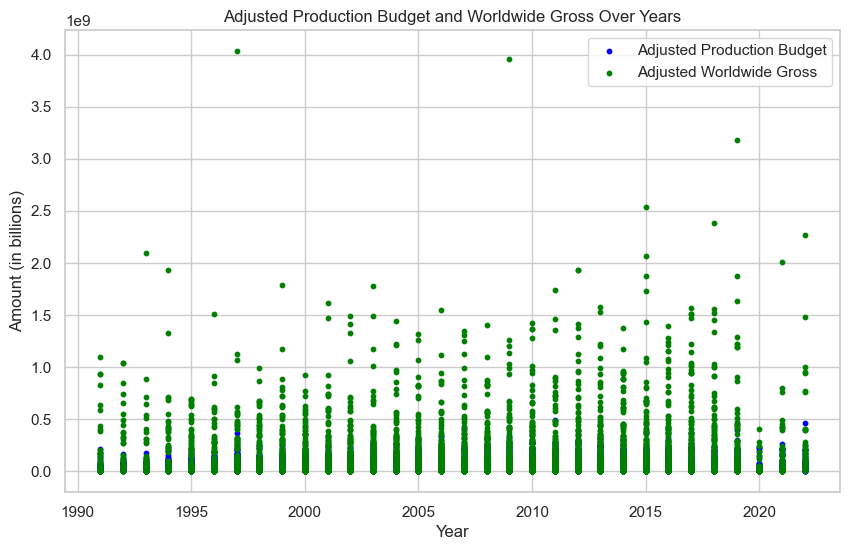

In [211]:
# Comparison of annual adjusted production budget and worldwide revenues
filtered_data = money_data[money_data['year'] > 1990]

# Scatter plot için marker boyutunu küçültme
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['year'], filtered_data['adjusted_production_budget'], label='Adjusted Production Budget', color='blue', s=10)  # 's' parametresi boyut
plt.scatter(filtered_data['year'], filtered_data['adjusted_worldwide_gross'], label='Adjusted Worldwide Gross', color='green', s=10)
plt.xlabel('Year')
plt.ylabel('Amount (in billions)')
plt.title('Adjusted Production Budget and Worldwide Gross Over Years')
plt.legend()
plt.grid(True)
plt.show()

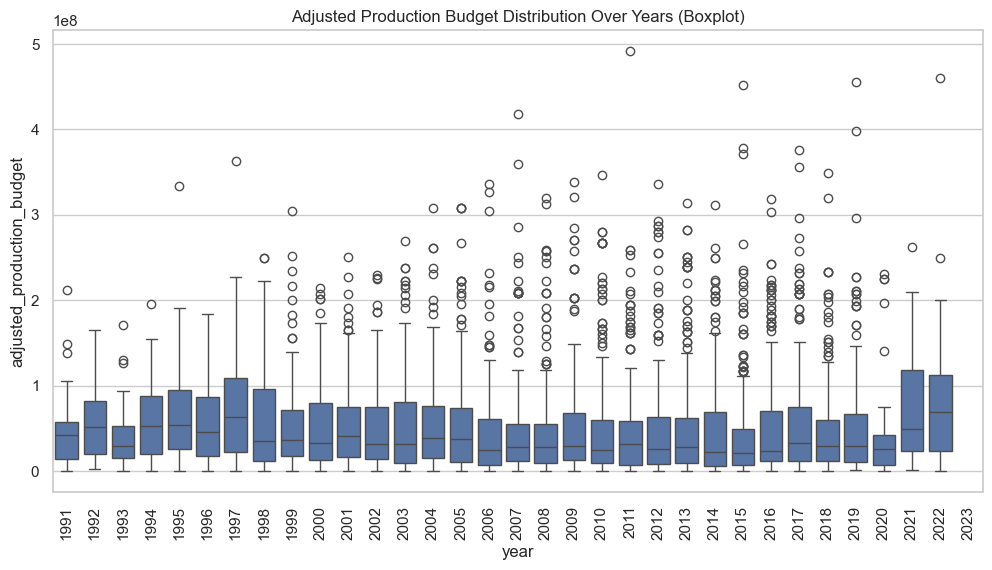

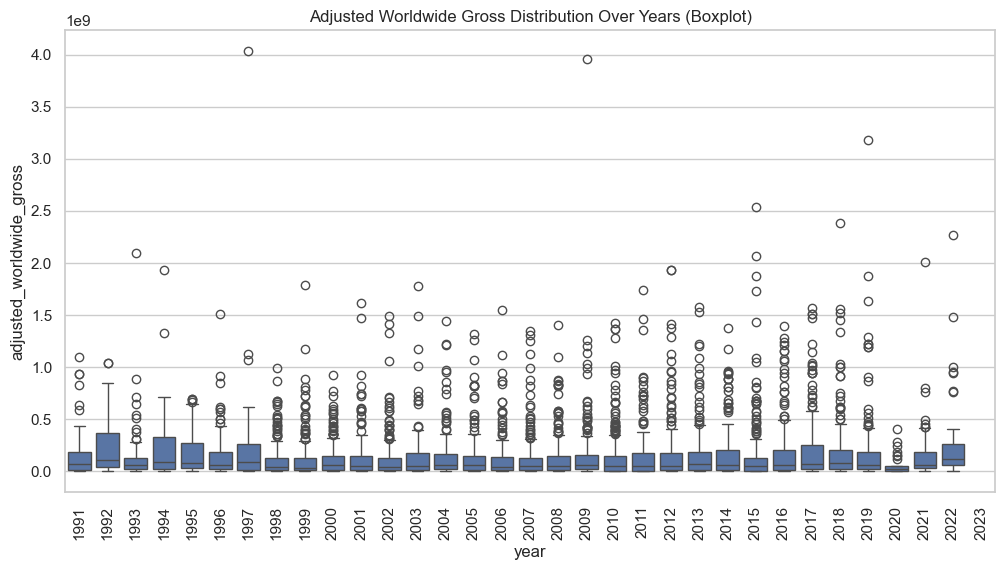

In [212]:
# Distribution by years with boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='year', y='adjusted_production_budget', data=filtered_data)
plt.xticks(rotation=90)  # X eksenindeki yılları net görmek için döndürme
plt.title('Adjusted Production Budget Distribution Over Years (Boxplot)')
plt.show()

# Likewise for Worldwide Gross
plt.figure(figsize=(12, 6))
sns.boxplot(x='year', y='adjusted_worldwide_gross', data=filtered_data)
plt.xticks(rotation=90)
plt.title('Adjusted Worldwide Gross Distribution Over Years (Boxplot)')
plt.show()

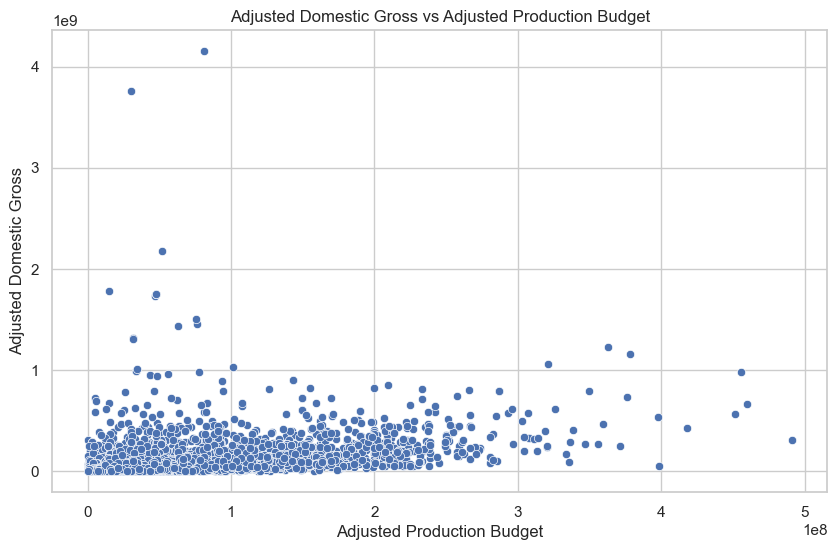

In [213]:
#Domestic Revenue and Production Budget Adjusted with Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=money_data['adjusted_production_budget'], y=money_data['adjusted_domestic_gross'])

plt.xlabel('Adjusted Production Budget')
plt.ylabel('Adjusted Domestic Gross')
plt.title('Adjusted Domestic Gross vs Adjusted Production Budget')
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

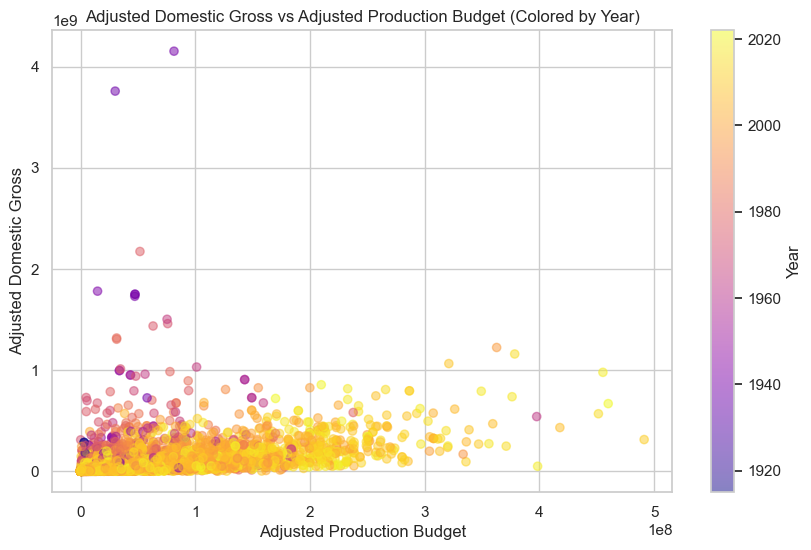

In [214]:
# Scatter plot with production budget and local revenue relationship (colored and clearer)
plt.figure(figsize=(10, 6))

# Adjusting colormap using 'plasma' colormap
plt.figure(figsize=(10, 6))
sc = plt.scatter(money_data['adjusted_production_budget'], 
                 money_data['adjusted_domestic_gross'], 
                 c=money_data['year'], cmap='plasma', alpha=0.5) 
plt.colorbar(sc, label='Year')
plt.xlabel('Adjusted Production Budget')
plt.ylabel('Adjusted Domestic Gross')
plt.title('Adjusted Domestic Gross vs Adjusted Production Budget (Colored by Year)')
plt.grid(True)
plt.show()


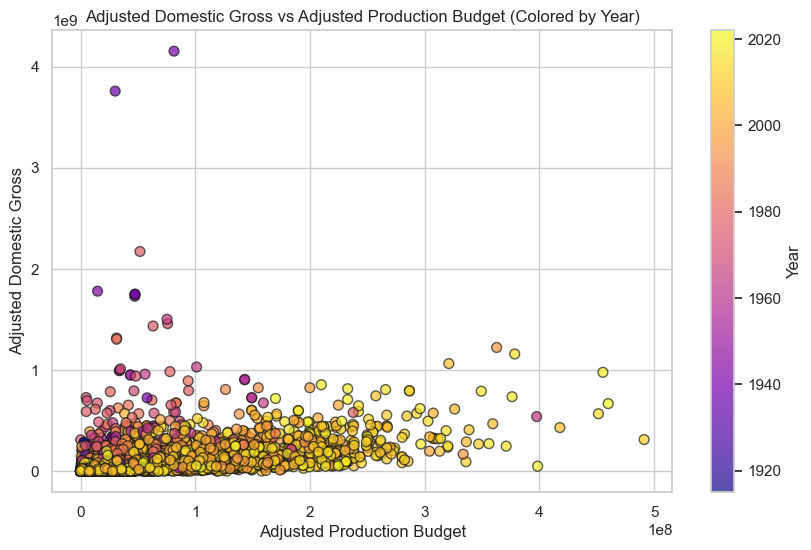

In [215]:
# Set plot style
sns.set(style="whitegrid")

# Scatter plot for Adjusted Domestic Gross vs Adjusted Production Budget
plt.figure(figsize=(10, 6))

# Define the scatter plot with better visual parameters
scatter = plt.scatter(money_data['adjusted_production_budget'],
                      money_data['adjusted_domestic_gross'],
                      c=money_data['year'], cmap='plasma', s=50, alpha=0.7, edgecolor='k')

# Add a color bar to indicate the years
cbar = plt.colorbar(scatter)
cbar.set_label('Year')

# Set titles and labels
plt.title('Adjusted Domestic Gross vs Adjusted Production Budget (Colored by Year)')
plt.xlabel('Adjusted Production Budget')
plt.ylabel('Adjusted Domestic Gross')

# Display the plot
plt.show()

In [216]:
# Step 1: Calculate Adjusted ROI
money_data['adjusted_ROI'] = (money_data['adjusted_worldwide_gross'] - money_data['adjusted_production_budget']) / money_data['adjusted_production_budget']


In [217]:
conn = sqlite3.connect('Data/im.db')

In [218]:
imdb_data = pd.read_sql('SELECT * FROM movie_basics', conn)
conn.close()

In [219]:
print(imdb_data.head())

    movie_id                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   start_year  runtime_minutes                genres  
0        2013            175.0    Action,Crime,Drama  
1        2019            114.0       Biography,Drama  
2        2018            122.0                 Drama  
3        2018              NaN          Comedy,Drama  
4        2017             80.0  Comedy,Drama,Fantasy  


In [220]:
print(imdb_data.columns)

Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object')


In [221]:
imdb_data['movie_title'] = imdb_data['primary_title'].str.strip()

# Merge the datasets using movie_title
combined_data = pd.merge(imdb_data, money_data, on='movie_title')

# Preview the merged dataset
print(combined_data.head())

    movie_id                    primary_title  \
0  tt0293429                    Mortal Kombat   
1  tt0293429                    Mortal Kombat   
2  tt0326592                    The Overnight   
3  tt0337692                      On the Road   
4  tt0359950  The Secret Life of Walter Mitty   

                    original_title  start_year  runtime_minutes_x  \
0                    Mortal Kombat        2021                NaN   
1                    Mortal Kombat        2021                NaN   
2                    The Overnight        2010               88.0   
3                      On the Road        2012              124.0   
4  The Secret Life of Walter Mitty        2013              114.0   

                   genres_x                      movie_title production_date  \
0  Action,Adventure,Fantasy                    Mortal Kombat      2021-04-08   
1  Action,Adventure,Fantasy                    Mortal Kombat      1995-08-18   
2                      None                    The

In [222]:
# Drop unnecessary or duplicate columns
combined_data_cleaned = combined_data.drop(columns=['runtime_minutes_x', 'movie', 'production_date', 'genres_y'])

# Preview the cleaned dataset
print(combined_data_cleaned.head())

    movie_id                    primary_title  \
0  tt0293429                    Mortal Kombat   
1  tt0293429                    Mortal Kombat   
2  tt0326592                    The Overnight   
3  tt0337692                      On the Road   
4  tt0359950  The Secret Life of Walter Mitty   

                    original_title  start_year                  genres_x  \
0                    Mortal Kombat        2021  Action,Adventure,Fantasy   
1                    Mortal Kombat        2021  Action,Adventure,Fantasy   
2                    The Overnight        2010                      None   
3                      On the Road        2012   Adventure,Drama,Romance   
4  The Secret Life of Walter Mitty        2013    Adventure,Comedy,Drama   

                       movie_title  runtime_minutes_y       director_name  \
0                    Mortal Kombat              110.0       Simon McQuoid   
1                    Mortal Kombat              101.0  Paul W.S. Anderson   
2                

In [223]:
combined_data_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4182 entries, 0 to 4181
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   movie_id                    4182 non-null   object        
 1   primary_title               4182 non-null   object        
 2   original_title              4181 non-null   object        
 3   start_year                  4182 non-null   int64         
 4   genres_x                    4109 non-null   object        
 5   movie_title                 4182 non-null   object        
 6   runtime_minutes_y           3771 non-null   float64       
 7   director_name               3771 non-null   object        
 8   director_professions        3771 non-null   object        
 9   director_birthYear          3771 non-null   object        
 10  director_deathYear          3771 non-null   object        
 11  movie_averageRating         3771 non-null   float64     

In [224]:
imdb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
 6   movie_title      146144 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 7.8+ MB


In [240]:
df_clean_movies = combined_data_cleaned[['movie_id','movie_title','genres_x','year','director_name','director_birthYear','director_deathYear',
                                            'adjusted_production_budget','adjusted_domestic_gross','adjusted_worldwide_gross','adjusted_ROI',
                                            'movie_averageRating','movie_numerOfVotes','approval_Index']]
df_clean_movies.head()

,movie_id,movie_title,genres_x,year,director_name,director_birthYear,director_deathYear,adjusted_production_budget,adjusted_domestic_gross,adjusted_worldwide_gross,adjusted_ROI,movie_averageRating,movie_numerOfVotes,approval_Index
0,tt0293429,Mortal Kombat,"Action,Adventure,Fantasy",2021,Simon McQuoid,\N,alive,5.771408e+07,4.441469e+07,8.762913e+07,0.518332,6.0,176605.0,5.201632
1,tt0293429,Mortal Kombat,"Action,Adventure,Fantasy",1995,Paul W.S. Anderson,1965,alive,3.811857e+07,1.342407e+08,2.327772e+08,5.106661,5.8,119670.0,4.857774
2,tt0326592,The Overnight,None,2015,Patrick Brice,1983,alive,2.473819e+05,1.372732e+06,1.442231e+06,4.829980,6.1,17175.0,4.244593
3,tt0337692,On the Road,"Adventure,Drama,Romance",2012,Walter Salles,1956,alive,3.185526e+07,9.184866e+05,1.186711e+07,-0.627468,6.0,42341.0,4.571170
4,tt0359950,The Secret Life of Walter Mitty,"Adventure,Comedy,Drama",2013,Ben Stiller,1965,alive,1.142376e+08,7.310810e+07,2.358331e+08,1.064409,7.3,321780.0,6.679448


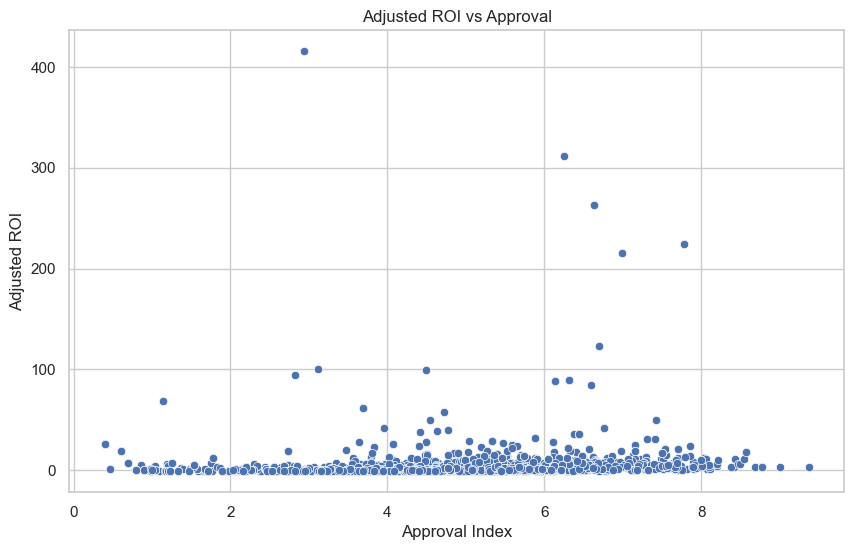

In [231]:
plt.figure(figsize=(10, 6))
sns.scatterplot(y=df_clean_movies['adjusted_ROI'], x=df_clean_movies['approval_Index'])

plt.ylabel('Adjusted ROI')
plt.xlabel('Approval Index')
plt.title('Adjusted ROI vs Approval')
plt.grid(True)
plt.show()

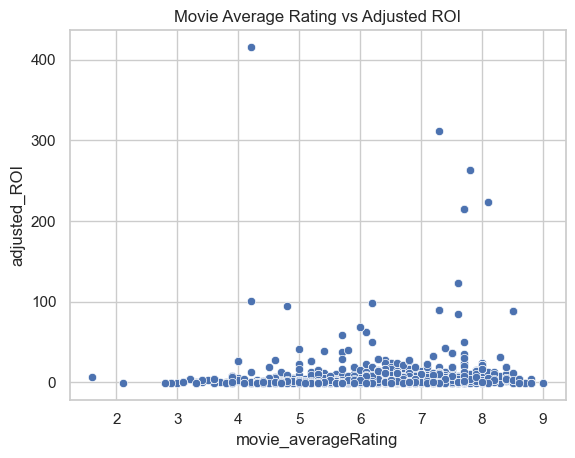

In [232]:
sns.scatterplot(data=df_clean_movies, x='movie_averageRating', y='adjusted_ROI')
plt.title('Movie Average Rating vs Adjusted ROI')
plt.show()


In [253]:
df_clean_movies['director_birthYear'] = pd.to_numeric(df_clean_movies['director_birthYear'], errors='coerce')
available_directors = df_clean_movies[
    (df_clean_movies['director_birthYear'] > 1952) & 
    (df_clean_movies['director_deathYear']=='alive')
]
director_roi = available_directors.groupby('director_name')['adjusted_ROI'].mean().sort_values(ascending=False).reset_index()


print(director_roi.head())

       director_name  adjusted_ROI
0       Tod Williams     58.170677
1      Nitesh Tiwari     31.120996
2      Barry Jenkins     28.451563
3     William Lustig     27.571429
4  David F. Sandberg     23.777532


C:\Users\erica\AppData\Local\Temp\ipykernel_40104\1371936000.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean_movies['director_birthYear'] = pd.to_numeric(df_clean_movies['director_birthYear'], errors='coerce')


In [248]:
print(director_roi.head(50))

         director_name  adjusted_ROI
0         Tod Williams     58.170677
1        Nitesh Tiwari     31.120996
2        Barry Jenkins     28.451563
3       William Lustig     27.571429
4    David F. Sandberg     23.777532
5         Jordan Peele     21.215722
6       Stephen Daldry     20.850594
7          Jeff Wadlow     20.568114
8     John R. Leonetti     19.736494
9       Michael Madsen     18.735563
10      John Krasinski     18.698628
11       Chuck Russell     18.534452
12        Daniel Stamm     18.496472
13     Takashi Shimizu     17.728112
14      James DeMonaco     17.222144
15        Adam Robitel     16.288277
16       Alex Kendrick     15.708095
17         Corin Hardy     15.517802
18    Scott Derrickson     15.379035
19             Ti West     14.131549
20        Steve Barron     13.962963
21       Drake Doremus     13.913600
22  Sam Taylor-Johnson     13.269874
23      Leigh Whannell     13.178853
24        David Lowery     12.956411
25      Peter Farrelly     12.912827
2

In [254]:
available_directors['genres_x'].fillna('Unknown', inplace=True)

director_stats = available_directors.groupby('director_name').agg({
    'genres_x': lambda x: ', '.join(set(x)),  # Get unique genres and join them as a string
    'adjusted_production_budget': 'mean'  # Calculate the average adjusted production budget
}).reset_index()
director_full_stats = pd.merge(director_roi, director_stats, on='director_name')

C:\Users\erica\AppData\Local\Temp\ipykernel_40104\3379184613.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  available_directors['genres_x'].fillna('Unknown', inplace=True)
C:\Users\erica\AppData\Local\Temp\ipykernel_40104\3379184613.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  available_directors['genres_x'].fillna('Unknown', inpla

In [260]:
director_full_stats.head(30)

,director_name,adjusted_ROI,genres_x,adjusted_production_budget,budget_category,movie_count
0,Tod Williams,58.170677,Horror,4.004398e+06,Low Budget,1
1,Nitesh Tiwari,31.120996,"Action,Biography,Drama, Action",1.151181e+07,Medium Budget,2
2,Barry Jenkins,28.451563,"Drama,Romance, Drama, Horror",5.869757e+06,Medium Budget,3
3,William Lustig,27.571429,"Action,Horror,Thriller, Horror,Thriller",1.186512e+06,Low Budget,2
4,David F. Sandberg,23.777532,"Drama,Mystery,Thriller, Documentary, Horror,My...",2.069518e+07,High Budget,7
5,Jordan Peele,21.215722,"Horror,Mystery,Thriller, Comedy, Drama",1.856064e+07,Medium Budget,4
6,Stephen Daldry,20.850594,"Comedy,Drama,Music",8.406897e+06,Medium Budget,1
7,Jeff Wadlow,20.568114,"Horror,Thriller, Comedy,Romance, Horror,Romanc...",8.433343e+06,Medium Budget,8
8,John R. Leonetti,19.736494,"Horror,Mystery,Thriller, Drama,Fantasy,Horror",1.116972e+07,Medium Budget,2
9,Michael Madsen,18.735563,"Horror,Mystery,Thriller, Documentary,Drama, Th...",6.184547e+06,Medium Budget,4


In [258]:
director_full_stats['budget_category'] = pd.cut(director_full_stats['adjusted_production_budget'], 
                                                bins=[0, 5e6, 2e7, np.inf], 
                                                labels=['Low Budget', 'Medium Budget', 'High Budget'])
budget_analysis = director_full_stats.groupby('budget_category')['adjusted_ROI'].mean().reset_index()
print(budget_analysis)

  budget_category  adjusted_ROI
0      Low Budget      3.626783
1   Medium Budget      3.359131
2     High Budget      2.026575


C:\Users\erica\AppData\Local\Temp\ipykernel_40104\4072766100.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  budget_analysis = director_full_stats.groupby('budget_category')['adjusted_ROI'].mean().reset_index()


In [259]:
movie_counts = available_directors.groupby('director_name').size().reset_index(name='movie_count')

director_full_stats = pd.merge(director_full_stats, movie_counts, on='director_name')